In [1]:
from Validation import *
from time import time
from utils import *
from grid_search import GridSearchSGDParams, grid_search_SGD
from Neural_network import *

### Load  Monk dataset

In [2]:
# chose monk dataset
monk = str(1)

In [3]:
columns = ['label', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'id']

# 1. traning set
train_file = "../monk_datasets/monks-" + monk + ".train"
train_data = pd.read_csv(train_file, delim_whitespace=True, header=None)
train_data.columns = columns

# 2. test set
test_file = "../monk_datasets/monks-" + monk + ".test"
test_data = pd.read_csv(test_file, delim_whitespace=True, header=None)
test_data.columns = columns

# 3. getting patterns and labels
encoding = [3, 3, 2, 3, 4, 2]
features = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
train_patterns, test_patterns = decode_patterns(encoding, features, train_data, test_data)
train_labels, test_labels = transform_labels(train_data, test_data)

# SGD

### SGD - define network and parameters

In [ ]:
# define architecture and hyperparameters
architecture = [17, 20, 10, 1]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, TanHNeuron]
network = Network(architecture, neurons)
loss_object = SquaredError("tangentH")
epochs = 30
learning_rate = 0.01
batch_size = 16
momentum = 0.9
regularization = 0.05

### SGD - train

In [ ]:
tic = time()
# 5. train
loss_train, misclass_train, \
loss_test, misclass_test = network.train(data=train_patterns, 
                                         targets=train_labels, 
                                         eval_data=test_patterns,
                                         eval_targets=test_labels,
                                         lossObject=loss_object,
                                         epochs=epochs, 
                                         learning_rate=learning_rate, 
                                         batch_size=batch_size,
                                         momentum=momentum, 
                                        regularization=regularization)
toc = time()

### SGD - learning curves

In [ ]:
plot_train_test_learning_curve(loss_test, loss_train, misclass_test, misclass_train)

In [ ]:
print "accuracy train:", 1 - misclass_train[-1]
print "accuracy test:", 1 - misclass_test[-1]
print "squared error train:", loss_train[-1]
print "squared error test:", loss_test[-1]
print "training time:", (toc-tic)

# BFGS

### BFGS - define network and parameters

In [20]:
architecture = [17, 20, 10, 1]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, TanHNeuron]
loss_object = SquaredError("tangentH")
c_1 = 1e-2
c_2 = 0.9
theta = 0.9
lambda_ = 5 * 1e-2
epsilon = 1e-3
epochs = 50

network = Network(architecture, neurons)

### BFGS - train

In [21]:
tic = time()
loss_tr, miss_tr, loss_ts, miss_ts = network.trainBFGS(train_patterns, train_labels, 
                                                       test_patterns, test_labels,
                                                       theta=theta, c_1=c_1, c_2=c_2, 
                                                       lossObject=loss_object, 
                                                       regularization=lambda_, 
                                                       epochs=epochs, epsilon=epsilon)
toc = time()

epoch	MSE			misclass		norm(g)		norm(h)		rho			alpha
---------------------------------------------------------------------------
1		1.226131	0.500000		1.191141	24.141918	1.287131	0.500000
2		1.138608	0.370968		1.130215	24.215377	0.882956	1.000000
3		0.918116	0.298387		0.778704	24.260092	2.843602	0.500000
4		0.728836	0.241935		0.665608	24.291937	1.346309	1.000000
5		0.645647	0.241935		0.794310	24.394817	4.324693	1.000000
6		0.641002	0.193548		0.795617	24.418701	2.046439	1.000000
7		0.481077	0.145161		0.342425	24.427988	4.652286	1.000000
8		0.438388	0.129032		0.316390	24.535168	9.541028	1.000000
9		0.403943	0.096774		0.372549	25.484889	18.219661	1.000000
10		0.374400	0.096774		0.316313	26.848980	11.329488	1.000000
11		0.334152	0.064516		0.193422	29.024242	26.832754	1.000000
12		0.303479	0.064516		0.148509	30.873619	14.527022	1.000000
13		0.291389	0.064516		0.118395	35.657355	77.205503	1.000000
14		0.280152	0.064516		0.091384	47.690317	135.009062	1.000000
15		0.266690	0.064516		0.117201	52

### BFGS - learning curves

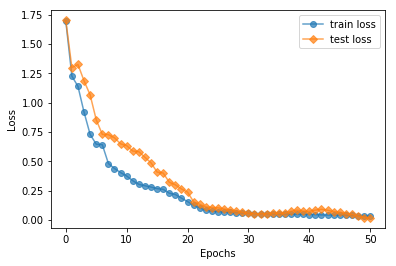

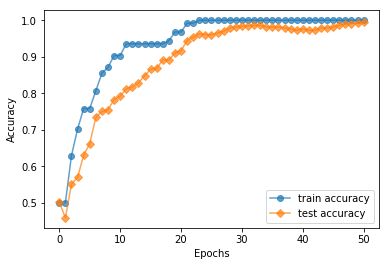

In [24]:
plot_train_test_learning_curve(loss_ts, loss_tr, miss_ts, miss_tr)

In [23]:
print "accuracy train:", 1 - miss_tr[-1]
print "accuracy test:", 1 - miss_ts[-1]
print "squared error train:", loss_tr[-1]
print "squared error test:", loss_ts[-1]
print "training time:", (toc-tic)

accuracy train: 1.0
accuracy test: 0.99537037037
squared error train: 0.0338206548221
squared error test: 0.0171323085308
training time: 32.5598299503
